In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
from csv import writer
from csv import reader
default_text = 'NaN'
# Open the input_file in read mode and output_file in write mode
with open("E:/assignment/assignment1/lung_cancer_examples.csv", 'r') as read_obj, \
        open('data.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)
output_data=pd.read_csv('data.csv')
output_data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result,NaN
0,John,Wick,35,3,5,4,1,NaN
1,John,Constantine,27,20,2,5,1,NaN
2,Camela,Anderson,30,0,5,2,0,NaN
3,Alex,Telles,28,0,8,1,0,NaN
4,Diego,Maradona,68,4,5,6,1,NaN


In [3]:
data = pd.read_csv('data.csv')

In [4]:
print(data.shape)
print(data.head(5))

(59, 8)
     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result  NaN
0    John         Wick   35       3      5       4       1  NaN
1    John  Constantine   27      20      2       5       1  NaN
2  Camela     Anderson   30       0      5       2       0  NaN
3    Alex       Telles   28       0      8       1       0  NaN
4   Diego     Maradona   68       4      5       6       1  NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     59 non-null     object 
 1   Surname  59 non-null     object 
 2   Age      59 non-null     int64  
 3   Smokes   59 non-null     int64  
 4   AreaQ    59 non-null     int64  
 5   Alkhol   59 non-null     int64  
 6   Result   59 non-null     int64  
 7   NaN      0 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 3.8+ KB


In [6]:
data.isnull().sum()

Name        0
Surname     0
Age         0
Smokes      0
AreaQ       0
Alkhol      0
Result      0
NaN        59
dtype: int64

In [7]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result,NaN
0,John,Wick,35,3,5,4,1,NaN
1,John,Constantine,27,20,2,5,1,NaN
2,Camela,Anderson,30,0,5,2,0,NaN
3,Alex,Telles,28,0,8,1,0,NaN
4,Diego,Maradona,68,4,5,6,1,NaN


In [19]:
X=data[['Age','Smokes','AreaQ','Alkhol']]
y=data['Result']

In [20]:
X

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6
5,34,0,10,0
6,58,15,10,0
7,22,12,5,2
8,45,2,6,0
9,52,18,4,5


In [21]:
y

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [23]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Predicting Model
pred = model.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in pred]
y_pred1

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0]

In [25]:
#Logistic Regression model
Logmodel = LogisticRegression()
Logmodel.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Predicting the model
y_pred2 = Logmodel.predict(X_test)
y_pred2

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [27]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
cm2= confusion_matrix(y_test,y_pred2)
print("Confusin Matrix: ")
print(cm1)
print(cm2)

Confusin Matrix: 
[[23  0]
 [ 1 18]]
[[20  3]
 [ 0 19]]


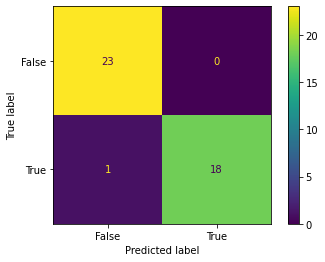

In [28]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [29]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9761904761904762


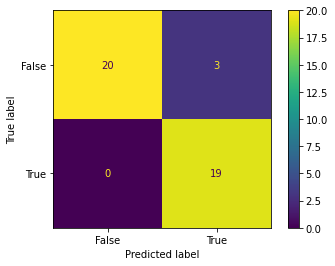

In [30]:
#Logics Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =[False,True])
cm_display.plot()
plt.show()

In [31]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9285714285714286


0.9736842105263157


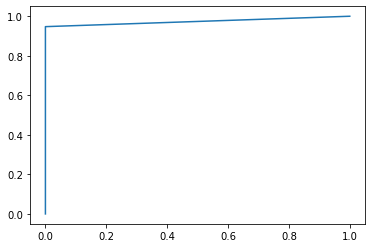

In [32]:
#ROC Curve -Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

0.9347826086956521


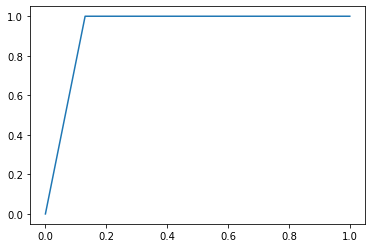

In [33]:
#ROC Curve Logistic 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

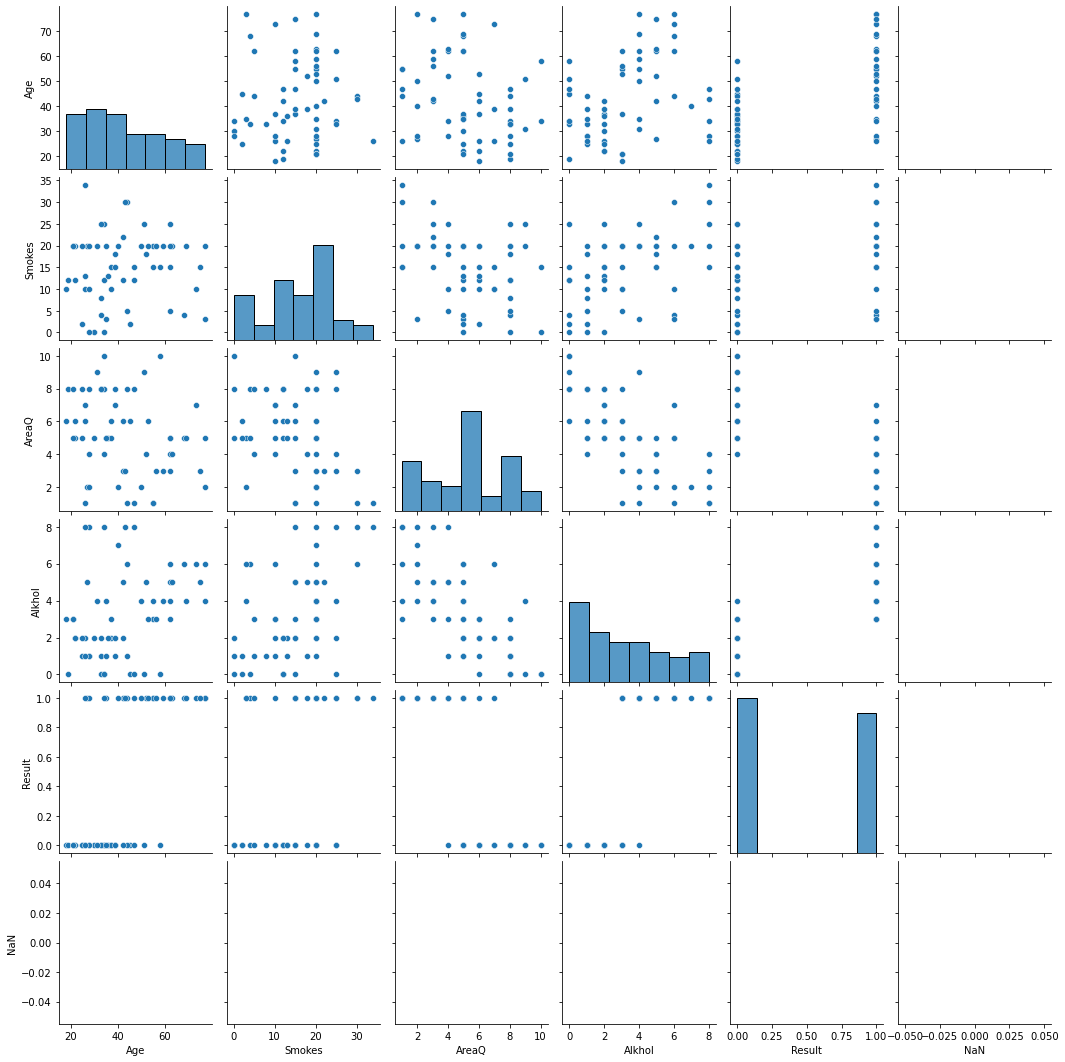

In [34]:
sns.pairplot(data)
plt.show()